In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline, make_union
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
path = '/Users/stefanflorin/Downloads/date_proiect/'

In [3]:
data = pd.read_csv('/Users/stefanflorin/Downloads/sampleSubmission.csv')

In [4]:
data.head()

,Id,Prediction
0,2984,10
1,2985,3
2,2986,9
3,2987,10
4,2988,3


In [5]:
data.tail()

,Id,Prediction
1492,4476,4
1493,4477,7
1494,4478,9
1495,4479,2
1496,4480,2


In [6]:
y_train = np.loadtxt(path + 'labels_train.txt')
y_train.shape

(2983,)

In [7]:
uniq_class_arr, counts = np.unique(y_train, return_counts=True)
print ('Unique classes :', uniq_class_arr)
print ('Number of unique classes : ', len(uniq_class_arr))

for _class in uniq_class_arr:
    print ('Counts for class ', int(uniq_class_arr[int(_class)]), ' : ', counts[int(_class)])

Unique classes : [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Number of unique classes :  11
Counts for class  0  :  293
Counts for class  1  :  269
Counts for class  2  :  269
Counts for class  3  :  269
Counts for class  4  :  269
Counts for class  5  :  269
Counts for class  6  :  269
Counts for class  7  :  269
Counts for class  8  :  269
Counts for class  9  :  269
Counts for class  10  :  269


In [8]:
nr_classes = len(np.unique(y_train) + 1)
nr_classes

11

In [9]:
def load_data(path):
    proiect_path = os.path.join(path)
    
    X_train = []
    X_test = []
    for dset in ['train', 'test']:
        curr_path = os.path.join(proiect_path, dset)
        for curr in sorted(os.listdir(curr_path)):
            if curr.endswith('.txt'):
                with open(os.path.join(curr_path, curr)) as f:
                    if dset=='train':
                        X_train.append(f.read())
                    else:
                        X_test.append(f.read())
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    
    return X_train, X_test

In [10]:
X_train, X_test = load_data(path)
X_train.shape, X_test.shape




((2983,), (1497,))

In [11]:
X_train[0]

"Commission 's legislation .\nWe need to formalise and accept the permanent ban which the Commission is proposing now and we need stringent health warnings and labelling to inform our consumers of the risks .\nWe have to answer to the public on the legislation that we produce in Parliament , and we cannot afford to be complacent about risks to children 's health .\nMr President , we congratulate Mr Arvidsson for his hard work .\nHe is in the unusual position of producing a report on Commission action which has already been taken and it is the way it has been taken that we are to some extent talking about here .\nThe ban on a range of identified phthalates was precautionary .\nIt attracted broad support and was also in line with the accepted practices of a number of Member States .\nIf we were simply balancing the health and safety of children against the needs and priorities of industry there would be no contest , but there are related issues which we should address .\nThe first is how

In [15]:
XX_train, XX_test, yy_train, yy_test = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

In [16]:
vectorizer = TfidfVectorizer(lowercase=True, 
                             ngram_range=(1,2), 
                             min_df=6, 
                             strip_accents='unicode', 
                             decode_error='ignore',
                             stop_words=['the','of', 'a', 'there','I', 'to', 'is' , 
                                         'have', 'and', 'it', ],
                             max_features=90000,
                             max_df = 0.95,
                             sublinear_tf=True,
                             #smooth_idf=False,
                             norm = 'l2',
                            )

XX_train = vectorizer.fit_transform(XX_train)
XX_train.shape

(2386, 46236)

## LinearSVC

In [17]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [18]:
svc = LinearSVC(C=100)

In [19]:
svc.fit(XX_train, yy_train)

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [21]:
XX_test = vectorizer.transform(XX_test)

In [22]:
print(accuracy_score(svc.predict(XX_test), yy_test))

0.9698492462311558


In [23]:
print(classification_report(svc.predict(XX_test), yy_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        64
         1.0       0.98      1.00      0.99        53
         2.0       0.96      0.98      0.97        55
         3.0       0.98      1.00      0.99        54
         4.0       0.96      0.96      0.96        45
         5.0       0.98      0.93      0.95        56
         6.0       1.00      1.00      1.00        46
         7.0       1.00      0.95      0.97        61
         8.0       0.89      0.98      0.93        55
         9.0       0.92      0.91      0.92        54
        10.0       1.00      0.96      0.98        54

    accuracy                           0.97       597
   macro avg       0.97      0.97      0.97       597
weighted avg       0.97      0.97      0.97       597



In [24]:
svc.score(XX_test, yy_test)

0.9698492462311558

In [25]:
opdasda = svc.predict(XX_test)
print(len(opdasda))

597


In [26]:
test = vectorizer.transform(X_test)

In [27]:
predicitions = svc.predict(test)
predicitions

array([9., 9., 7., ..., 1., 7., 3.])

In [28]:
data = data.drop(columns='Prediction')
data.head()

,Id
0,2984
1,2985
2,2986
3,2987
4,2988


In [30]:
desired_array = [int(numeric_string) for numeric_string in predicitions]

In [31]:
data['Prediction'] = desired_array
data.head()

,Id,Prediction
0,2984,9
1,2985,9
2,2986,7
3,2987,1
4,2988,2


In [32]:
data.to_csv('/Users/stefanflorin/Desktop/submissions_ala_bun.csv', index=False)
data.head()

,Id,Prediction
0,2984,9
1,2985,9
2,2986,7
3,2987,1
4,2988,2


## KFold Cross Validation

In [33]:
from sklearn.model_selection import KFold

In [34]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
kf

KFold(n_splits=10, random_state=42, shuffle=True)

In [35]:
kf.get_n_splits(XX_train)

10

In [38]:
def get_score(svc, X_train, y_train, X_test, y_test):
    
    vectorizer = TfidfVectorizer(lowercase=True, 
                             ngram_range=(1,2), 
                             min_df=6, 
                             strip_accents='unicode', 
                             decode_error='ignore',
                             stop_words=['the','of', 'a', 'there','I', 'to', 'is' , 
                                         'have', 'and', 'it', ],
                             max_features=90000,
                             max_df = 0.95,
                             sublinear_tf=True,
                             #smooth_idf=False,
                             norm = 'l2',
                            )

    XX_train = vectorizer.fit_transform(X_train)
    XX_test = vectorizer.transform(X_test)
    svc.fit(XX_train, y_train)
    return svc.score(XX_test, y_test)

In [39]:
scores_svc = []
#scores_nb = []
#scores_lr = []
for train_index, test_index in kf.split(X_train):
    train_text, test_text, train_target, test_target = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
    scores_svc.append(get_score(svc, train_text, train_target, test_text, test_target))
    #scores_lr.append(get_score(lr, train_text, train_target, test_text, test_target))
    #scores_nb.append(get_score(nb, train_text, train_target, test_text, test_target))
print(scores_svc)

[0.9765886287625418, 0.9698996655518395, 0.9732441471571907, 0.9765100671140939, 0.9865771812080537, 0.9798657718120806, 0.9630872483221476, 0.9664429530201343, 0.959731543624161, 0.9697986577181208]


In [40]:
print(np.mean(scores_svc))

0.9721745864290364


## Matricea de Confuzie

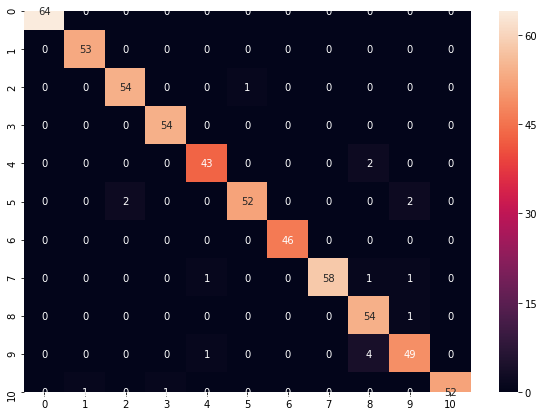

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(opdasda, yy_test)
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.show()